
### In this code 3 majors topic implemented:

#### 1- Data Exploration which include getting data from S&P500 and find stocks for specific sector. Then data for one specific stock "here is Amazan" will be read from Web  and then buy and  sell signal will be created.


####  2- Technical approach will be studied which contain of implements of technical indicators then some trading algorithm will be developed.

#### 3- Finally machine learning algorithm will be developed for creation buying and selling signal



#### INSERT REQUIRED  MODULE and LIBRARY

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math as math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from pandas_datareader import data     # only for jupyter
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
!pip install yfinance 
import yfinance as yf 
import warnings
warnings.filterwarnings('ignore')

#### 1- Data Exploration

In [72]:




# Data Exploration which include getting data from S&P500 and find stocks for specific sector. Then data for one specific stock "here is Amazan" will be read from Web and then buy and
# and then buy and  sell signal will be created.

# Data Exploration

payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
print(df.head())

symbols = df['Symbol'].values.tolist()
print(symbols[:500])

names = df['Security'].values.tolist()
print(names[:15])

#Get list of sector  sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)
print(sectors)

#Get list of Consumer Discretionary'

Consumer_Discretionary_df = df[df['GICS Sector'] == 'Consumer Discretionary']
Consumer_Discretionary_symbols = Consumer_Discretionary_df['Symbol'].values.tolist()

print(Consumer_Discretionary_symbols)

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

In [73]:

  
start_date = '2010-01-01'
end_date = '2020-11-25' 
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
Stock_data = yf.download('AAPL',start_date,end_date) 
 

[*********************100%***********************]  1 of 1 completed


In [74]:
Stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.539882,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656428,6.551187,601904800
2010-01-06,7.656428,7.686786,7.526786,7.534643,6.446983,552160000
2010-01-07,7.562500,7.571429,7.466072,7.520714,6.435065,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.477847,447610800
...,...,...,...,...,...,...
2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100
2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000
2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400


##### DATS CLEANING

                 price  daily_difference  signal  positions
Date                                                       
2010-01-04    6.539882               NaN     0.0        NaN
2010-01-05    6.551187          0.011305     1.0        1.0
2010-01-06    6.446983         -0.104204     0.0       -1.0
2010-01-07    6.435065         -0.011918     0.0        0.0
2010-01-08    6.477847          0.042781     1.0        1.0
...                ...               ...     ...        ...
2020-11-18  118.029999         -1.360001     0.0        0.0
2020-11-19  118.639999          0.610001     1.0        1.0
2020-11-20  117.339996         -1.300003     0.0       -1.0
2020-11-23  113.849998         -3.489998     0.0        0.0
2020-11-24  115.169998          1.320000     1.0        1.0

[2744 rows x 4 columns]


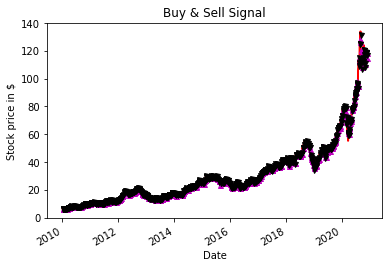

[*********************100%***********************]  1 of 1 completed


In [75]:

Stock_data_signal = pd.DataFrame(index=Stock_data.index)
Stock_data_signal['price'] = Stock_data['Adj Close']
Stock_data_signal['daily_difference'] = Stock_data_signal['price'].diff()
Stock_data_signal['signal'] = 0.0
Stock_data_signal['signal'][:] = np.where(Stock_data_signal['daily_difference'][:] > 0, 1.0, 0.0)

Stock_data_signal['positions'] = Stock_data_signal['signal'].diff()
print(Stock_data_signal)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Stock price in $')
plt.title('Buy & Sell Signal')
Stock_data_signal['price'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(Stock_data_signal.loc[Stock_data_signal.positions == 1.0].index,
         Stock_data_signal.price[Stock_data_signal.positions == 1.0],
         '^', markersize=5, color='m')

ax1.plot(Stock_data_signal.loc[Stock_data_signal.positions == -1.0].index,
         Stock_data_signal.price[Stock_data_signal.positions == -1.0],
         'v', markersize=5, color='k')
plt.show()


Stock_data2 = yf.download('AAPL',start_date,end_date) 
Stock_data=Stock_data2.tail(620)
lows=Stock_data['Low']
highs=Stock_data['High']

#### 2- TECHNICAL APPROACH WILL BE STUDIED WHICH CONTAIN OF IMPLEMENTS OF TECHNICAL INDICATORS THEN SOME TRADING ALGORITHM WILL BE DEVELOPED


#### 2-1-TECHNICAL INDICATORS

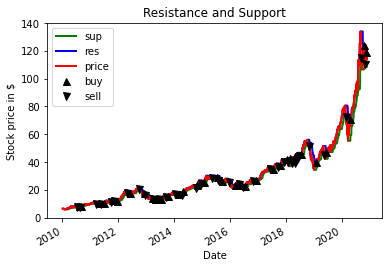

In [53]:


# Trading_Support_Resistance
def trading_support_resistance(data, bin_width=20):
  data['sup_tolerance'] = pd.Series(np.zeros(len(data)))
  data['res_tolerance'] = pd.Series(np.zeros(len(data)))
  data['sup_count'] = pd.Series(np.zeros(len(data)))
  data['res_count'] = pd.Series(np.zeros(len(data)))
  data['sup'] = pd.Series(np.zeros(len(data)))
  data['res'] = pd.Series(np.zeros(len(data)))
  data['positions'] = pd.Series(np.zeros(len(data)))
  data['signal'] = pd.Series(np.zeros(len(data)))
  in_support=0
  in_resistance=0
  for x in range((bin_width - 1) + bin_width, len(data)):
    data_section = data[x - bin_width:x + 1]
    support_level=min(data_section['price'])
    resistance_level=max(data_section['price'])
    range_level=resistance_level-support_level
    data['res'][x]=resistance_level
    data['sup'][x]=support_level
    data['sup_tolerance'][x]=support_level + 0.2 * range_level
    data['res_tolerance'][x]=resistance_level - 0.2 * range_level
    if data['price'][x]>=data['res_tolerance'][x] and\
      data['price'][x] <= data['res'][x]:
      in_resistance+=1
      data['res_count'][x]=in_resistance
    elif data['price'][x] <= data['sup_tolerance'][x] and \
      data['price'][x] >= data['sup'][x]:
      in_support += 1
      data['sup_count'][x] = in_support
    else:
      in_support=0
      in_resistance=0
    if in_resistance>2:
      data['signal'][x]=1
    elif in_support>2:
      data['signal'][x]=0
    else:
      data['signal'][x] = data['signal'][x-1]
  data['positions']=data['signal'].diff()
trading_support_resistance(Stock_data_signal)

fig = plt.figure()


ax1 = fig.add_subplot(111, ylabel='Stock price in $')
Stock_data_signal['sup'].plot(ax=ax1, color='g', lw=2.)
Stock_data_signal['res'].plot(ax=ax1, color='b', lw=2.)
Stock_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(Stock_data_signal.loc[Stock_data_signal.positions == 1.0].index,
Stock_data_signal.price[Stock_data_signal.positions == 1.0],
'^', markersize=7, color='k',label='buy')
ax1.plot(Stock_data_signal.loc[Stock_data_signal.positions == -1.0].index,
Stock_data_signal.price[Stock_data_signal.positions == -1.0],
'v', markersize=7, color='k',label='sell')
plt.legend()
plt.title('Resistance and Support')
plt.show()

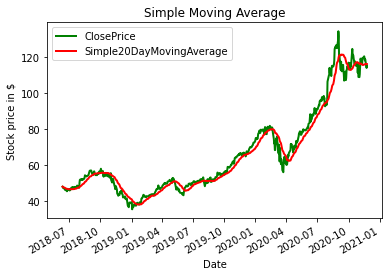

In [78]:
########################################################################################################################
#Simple Moving Avarage


close = Stock_data['Close']
time_period = 20 # number of days over which to average
history = [] # to track a history of prices
sma_values = [] # to track simple moving average values
for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # we remove oldest price because we only average over last 'time_period' prices
    del (history[0])

  sma_values.append(stats.mean(history))

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
sma = Stock_data['Simple20DayMovingAverage']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)

plt.title('Simple Moving Average')

plt.show()


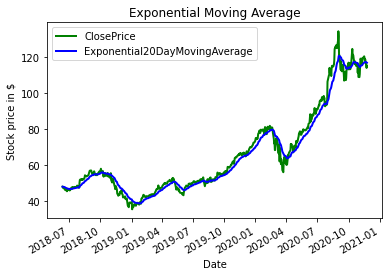

In [79]:
########################################################################################################################
#exponential moving average

num_periods = 20  # number of days over which to average
K = 2 / (num_periods + 1)  # smoothing constant
ema_p = 0

ema_values = []  # to hold computed EMA values
for close_price in close:
    if (ema_p == 0):  # first observation, EMA = current-price
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p

    ema_values.append (ema_p)

Stock_data = Stock_data.assign (ClosePrice=pd.Series (close, index=Stock_data.index))
Stock_data = Stock_data.assign (Exponential20DayMovingAverage=pd.Series (ema_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
ema = Stock_data['Exponential20DayMovingAverage']


fig = plt.figure ()
ax1 = fig.add_subplot (111, ylabel='Stock price in $')
close_price.plot (ax=ax1, color='g', lw=2., legend=True)
ema.plot (ax=ax1, color='b', lw=2., legend=True)

plt.title('Exponential Moving Average')
plt.show ()


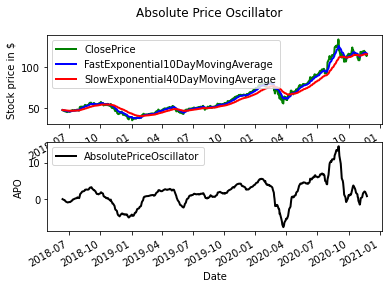

In [80]:
########################################################################################################################
# The Absolute Price Oscillator
num_periods_fast = 10 # time period for the fast EMA
K_fast = 2 / (num_periods_fast + 1) # smoothing factor for fast EMA
ema_fast = 0
num_periods_slow = 40 # time period for slow EMA
K_slow = 2 / (num_periods_slow + 1) # smoothing factor for slow EMA
ema_slow = 0

ema_fast_values = [] # we will hold fast EMA values for visualization purposes
ema_slow_values = [] # we will hold slow EMA values for visualization purposes
apo_values = [] # track computed absolute price oscillator values
for close_price in close:
  if (ema_fast == 0): # first observation
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)
  apo_values.append(ema_fast - ema_slow)

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=Stock_data.index))
Stock_data = Stock_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=Stock_data.index))
Stock_data = Stock_data.assign(AbsolutePriceOscillator=pd.Series(apo_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
ema_f = Stock_data['FastExponential10DayMovingAverage']
ema_s = Stock_data['SlowExponential40DayMovingAverage']
apo = Stock_data['AbsolutePriceOscillator']


fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)
plt.suptitle('Absolute Price Oscillator')

plt.show()

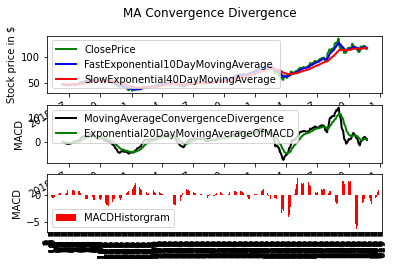

In [81]:
########################################################################################################################

#The Moving Average Convergence Divergence
num_periods_fast = 10 # fast EMA time period
K_fast = 2 / (num_periods_fast + 1) # fast EMA smoothing factor
ema_fast = 0
num_periods_slow = 40 # slow EMA time period
K_slow = 2 / (num_periods_slow + 1) # slow EMA smoothing factor
ema_slow = 0
num_periods_macd = 20 # MACD EMA time period
K_macd = 2 / (num_periods_macd + 1) # MACD EMA smoothing factor
ema_macd = 0

ema_fast_values = [] # track fast EMA values for visualization purposes
ema_slow_values = [] # track slow EMA values for visualization purposes
macd_values = [] # track MACD values for visualization purposes
macd_signal_values = [] # MACD EMA values tracker
macd_historgram_values = [] # MACD - MACD-EMA
for close_price in close:
  if (ema_fast == 0): # first observation
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)

  macd = ema_fast - ema_slow # MACD is fast_MA - slow_EMA
  if ema_macd == 0:
    ema_macd = macd
  else:
    ema_macd = (macd - ema_macd) * K_macd + ema_macd # signal is EMA of MACD values

  macd_values.append(macd)
  macd_signal_values.append(ema_macd)
  macd_historgram_values.append(macd - ema_macd)

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=Stock_data.index))
Stock_data = Stock_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=Stock_data.index))
Stock_data = Stock_data.assign(MovingAverageConvergenceDivergence=pd.Series(macd_values, index=Stock_data.index))
Stock_data = Stock_data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(macd_signal_values, index=Stock_data.index))
Stock_data = Stock_data.assign(MACDHistorgram=pd.Series(macd_historgram_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
ema_f = Stock_data['FastExponential10DayMovingAverage']
ema_s = Stock_data['SlowExponential40DayMovingAverage']
macd = Stock_data['MovingAverageConvergenceDivergence']
ema_macd = Stock_data['Exponential20DayMovingAverageOfMACD']
macd_histogram = Stock_data['MACDHistorgram']


fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
macd.plot(ax=ax2, color='black', lw=2., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', kind='bar', legend=True, use_index=False)
plt.suptitle('MA Convergence Divergence')

plt.show()


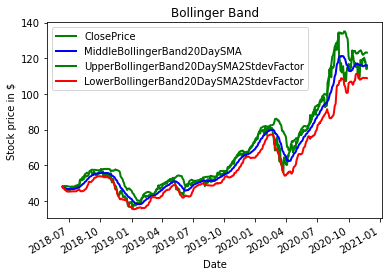

In [82]:
########################################################################################################################
#The Bollinger Band (BBANDS) study created

time_period = 20 # history length for Simple Moving Average for middle band
stdev_factor = 2 # Standard Deviation Scaling factor for the upper and lower bands
history = [] # price history for computing simple moving average
sma_values = [] # moving average of prices for visualization purposes
upper_band = [] # upper band values
lower_band = [] # lower band values

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # we only want to maintain at most 'time_period' number of price observations
    del (history[0])

  sma = stats.mean(history)
  sma_values.append(sma) # simple moving average or middle band
  variance = 0 # variance is the square of standard deviation
  for hist_price in history:
    variance = variance + ((hist_price - sma) ** 2)

  stdev = math.sqrt(variance / len(history)) # use square root to get standard deviation

  upper_band.append(sma + stdev_factor * stdev)
  lower_band.append(sma - stdev_factor * stdev)

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(MiddleBollingerBand20DaySMA=pd.Series(sma_values, index=Stock_data.index))
Stock_data = Stock_data.assign(UpperBollingerBand20DaySMA2StdevFactor=pd.Series(upper_band, index=Stock_data.index))
Stock_data = Stock_data.assign(LowerBollingerBand20DaySMA2StdevFactor=pd.Series(lower_band, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
mband = Stock_data['MiddleBollingerBand20DaySMA']
uband = Stock_data['UpperBollingerBand20DaySMA2StdevFactor']
lband = Stock_data['LowerBollingerBand20DaySMA2StdevFactor']


fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='g', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)
plt.title('Bollinger Band')

plt.show()


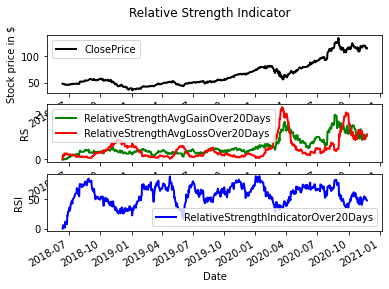

In [83]:
########################################################################################################################
# The Relative Strength Index (RSI)


time_period = 20 # look back period to compute gains & losses
gain_history = [] # history of gains over look back period (0 if no gain, magnitude of gain if gain)
loss_history = [] # history of losses over look back period (0 if no loss, magnitude of loss if loss)
avg_gain_values = [] # track avg gains for visualization purposes
avg_loss_values = [] # track avg losses for visualization purposes
rsi_values = [] # track computed RSI values
last_price = 0 # current_price - last_price > 0 => gain. current_price - last_price < 0 => loss.

for close_price in close:
  if last_price == 0:
    last_price = close_price

  gain_history.append(max(0, close_price - last_price))
  loss_history.append(max(0, last_price - close_price))
  last_price = close_price

  if len(gain_history) > time_period: # maximum observations is equal to lookback period
    del (gain_history[0])
    del (loss_history[0])

  avg_gain = stats.mean(gain_history) # average gain over lookback period
  avg_loss = stats.mean(loss_history) # average loss over lookback period

  avg_gain_values.append(avg_gain)
  avg_loss_values.append(avg_loss)

  rs = 0
  if avg_loss > 0: # to avoid division by 0, which is undefined
    rs = avg_gain / avg_loss

  rsi = 100 - (100 / (1 + rs))
  rsi_values.append(rsi)

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(RelativeStrengthAvgGainOver20Days=pd.Series(avg_gain_values, index=Stock_data.index))
Stock_data = Stock_data.assign(RelativeStrengthAvgLossOver20Days=pd.Series(avg_loss_values, index=Stock_data.index))
Stock_data = Stock_data.assign(RelativeStrengthIndicatorOver20Days=pd.Series(rsi_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
rs_gain = Stock_data['RelativeStrengthAvgGainOver20Days']
rs_loss = Stock_data['RelativeStrengthAvgLossOver20Days']
rsi = Stock_data['RelativeStrengthIndicatorOver20Days']


fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=2., legend=True)
rs_loss.plot(ax=ax2, color='r', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='RSI')
rsi.plot(ax=ax3, color='b', lw=2., legend=True)
plt.suptitle('Relative Strength Indicator')


plt.show()

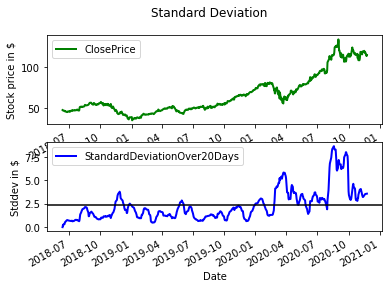

In [84]:
########################################################################################################################

# Standard Deviation is a statistical calculation
time_period = 20 # look back period
history = [] # history of prices
sma_values = [] # to track moving average values for visualization purposes
stddev_values = [] # history of computed stdev values

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # we track at most 'time_period' number of prices
    del (history[0])

  sma = stats.mean(history)
  sma_values.append(sma)
  variance = 0 # variance is square of standard deviation
  for hist_price in history:
    variance = variance + ((hist_price - sma) ** 2)

  stdev = math.sqrt(variance / len(history))

  stddev_values.append(stdev)

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
stddev = Stock_data['StandardDeviationOver20Days']


fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
ax2.axhline(y=stats.mean(stddev_values), color='k')
plt.suptitle('Standard Deviation')

plt.show()


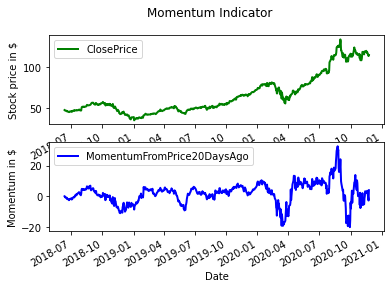

In [85]:
########################################################################################################################
# The Momentum (MOM) indicator compares the

time_period = 20
history = [] # history of observed prices to use in momentum calculation
mom_values = [] # track momentum values for visualization purposes

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # history is at most 'time_period' number of observations
    del (history[0])

  mom = close_price - history[0]
  mom_values.append(mom)

Stock_data = Stock_data.assign(ClosePrice=pd.Series(close, index=Stock_data.index))
Stock_data = Stock_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=Stock_data.index))

close_price = Stock_data['ClosePrice']
mom = Stock_data['MomentumFromPrice20DaysAgo']


fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Stock price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum in $')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
plt.suptitle('Momentum Indicator ')

plt.show()

#### 2-2-TRADING STRATEGY

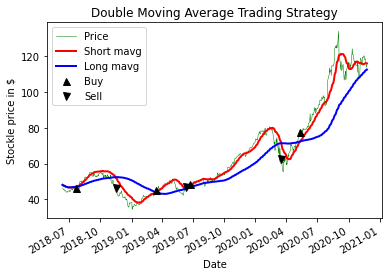

In [87]:
########################################################################################################################
#Double Moving Average

def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['Close'].\
        rolling(window=short_window,
                min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['Close'].\
        rolling(window=long_window,
                min_periods=1, center=False).mean()
    signals['signal'][short_window:] =\
        np.where(signals['short_mavg'][short_window:]
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals

ts=double_moving_average(Stock_data,20,100)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Stockle price in $')
Stock_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)

ax1.plot(ts.loc[ts.orders== 1.0].index,
         Stock_data["Adj Close"][ts.orders == 1.0],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         Stock_data["Adj Close"][ts.orders == -1.0],
         'v', markersize=7, color='k')

plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Double Moving Average Trading Strategy")

plt.show()


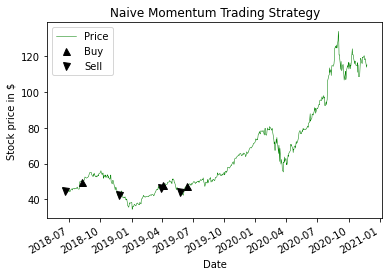

In [88]:
################################################################################################################################################################################################

# Naive Momentum Trading Strategy


def naive_momentum_trading(financial_data, nb_conseq_days):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    cons_day=0
    prior_price=0
    init=True
    for k in range(len(financial_data['Adj Close'])):
        price=financial_data['Adj Close'][k]
        if init:
            prior_price=price
            init=False
        elif price>prior_price:
            if cons_day<0:
                cons_day=0
            cons_day+=1
        elif price<prior_price:
            if cons_day>0:
                cons_day=0
            cons_day-=1
        if cons_day==nb_conseq_days:
            signals['orders'][k]=1
        elif cons_day == -nb_conseq_days:
            signals['orders'][k]=-1


    return signals


ts=naive_momentum_trading(Stock_data, 5)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Stock price in $')
Stock_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)

ax1.plot(ts.loc[ts.orders== 1.0].index,
         Stock_data["Adj Close"][ts.orders == 1],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         Stock_data["Adj Close"][ts.orders == -1],
         'v', markersize=7, color='k')

plt.legend(["Price","Buy","Sell"])
plt.title("Naive Momentum Trading Strategy")

plt.show()


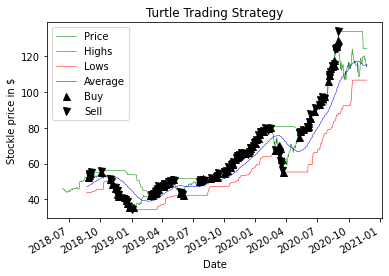

In [89]:
def turtle_trading(financial_data, window_size):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    # window_size-days high
    signals['high'] = financial_data['Adj Close'].shift(1).\
        rolling(window=window_size).max()
    # window_size-days low
    signals['low'] = financial_data['Adj Close'].shift(1).\
        rolling(window=window_size).min()
    # window_size-days mean
    signals['avg'] = financial_data['Adj Close'].shift(1).\
        rolling(window=window_size).mean()


    signals['long_entry'] = financial_data['Adj Close'] > signals.high
    signals['short_entry'] = financial_data['Adj Close'] < signals.low


    signals['long_exit'] = financial_data['Adj Close'] < signals.avg
    signals['short_exit'] = financial_data['Adj Close'] > signals.avg

    init=True
    position=0
    for k in range(len(signals)):
        if signals['long_entry'][k] and position==0:
            signals.orders.values[k] = 1
            position=1
        elif signals['short_entry'][k] and position==0:
            signals.orders.values[k] = -1
            position=-1
        elif signals['short_exit'][k] and position>0:
            signals.orders.values[k] = -1
            position = 0
        elif signals['long_exit'][k] and position < 0:
            signals.orders.values[k] = 1
            position = 0
        else:
            signals.orders.values[k] = 0

    return signals

ts=turtle_trading(Stock_data, 50)

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Stockle price in $')
Stock_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["high"].plot(ax=ax1, color='g', lw=.5)
ts["low"].plot(ax=ax1, color='r', lw=.5)
ts["avg"].plot(ax=ax1, color='b', lw=.5)


ax1.plot(ts.loc[ts.orders== 1.0].index,
         Stock_data["Adj Close"][ts.orders == 1.0],
         '^', markersize=7, color='k')

ax1.plot(ts.loc[ts.orders== -1.0].index,
         Stock_data["Adj Close"][ts.orders == -1.0],
         'v', markersize=7, color='k')




plt.legend(["Price","Highs","Lows","Average","Buy","Sell"])
plt.title("Turtle Trading Strategy")

plt.show()


In [90]:
################################################################################################################################################################################################
#3- Finally machine learning algorithm will be developed for creation buying and selling signal
start_date = '2001-01-01',
end_date = '2020-11-25'


def load_financial_data(start_date, end_date, output_file):
    df = yf.download('AMZN', start_date, end_date)
    df.to_pickle(output_file)
    return df


[*********************100%***********************]  1 of 1 completed
Coefficients: 
 [[0.07200199 0.01738649]]
               Open     High      Low    Close  Adj Close    Volume  \
Date                                                                  
2001-01-02  15.8125  16.0000  13.6250  13.8750    13.8750   9203500   
2001-01-03  13.6250  17.8750  13.5625  17.5625    17.5625  14680400   
2001-01-04  17.0000  17.5625  15.4375  15.5000    15.5000  10620500   
2001-01-05  15.5000  15.8750  13.5625  14.5625    14.5625   8798800   
2001-01-08  14.4375  15.5625  13.7500  14.9375    14.9375  10444700   

            Open-Close  High-Low  Target  Predicted_Signal  Stock_Returns  
Date                                                                       
2001-01-02      1.9375    2.3750  3.6875          0.294100            NaN  
2001-01-03     -3.9375    4.3125 -2.0625         -0.095225       0.235677  
2001-01-04      1.5000    2.1250 -0.9375          0.258253      -0.124926  
2001-01-05 

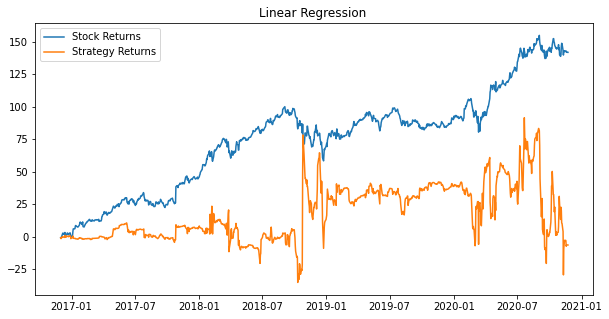

1.4862274694818345
Mean squared error: 24.05
Variance score: 0.00
Mean squared error: 1524.21
Variance score: -0.01


In [91]:
############################################################################################################################################
# LinearRegression


def create_regression_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df['Target'] = df['Close'].shift(-1) - df['Close']
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    Y = df[['Target']]
    return (df, X, Y)

def create_train_split_group(X, Y, split_ratio=0.8):
    return train_test_split(X, Y, shuffle=False, train_size=split_ratio)

Stock_data = load_financial_data(
    start_date='2001-01-01',
    end_date = '2020-11-25',
    output_file='Stock_data_large.pkl')

Stock_data, X, Y = create_regression_trading_condition(Stock_data)

X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

# Fit the model
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', ols.coef_)

Stock_data['Predicted_Signal'] = ols.predict(X)
Stock_data['Stock_Returns'] = np.log(
    Stock_data['Close'] / Stock_data['Close'].shift(1))

print(Stock_data.head())

plt.show()
def calculate_return(df, split_value, symbol):
    cum_Stock_return = df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns'] = df['%s_Returns' %
                                symbol] * df['Predicted_Signal'].shift(1)
    return cum_Stock_return


def calculate_strategy_return(df, split_value, symbol):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return


cum_Stock_return = calculate_return(
    Stock_data, split_value=len(X_train), symbol='Stock')
cum_strategy_return = calculate_strategy_return(
    Stock_data, split_value=len(X_train), symbol='Stock')


def plot_shart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return, label='Strategy Returns')
    plt.legend()
    plt.title ("Linear Regression ")

    plt.show()

plot_shart(cum_Stock_return, cum_strategy_return, symbol='Stock')

def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std = strategy_returns.std()
    sharpe = (strategy_returns - symbol_returns) / strategy_std
    return sharpe.mean()


print(sharpe_ratio(cum_strategy_return, cum_Stock_return))

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_train, ols.predict(X_train)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_train, ols.predict(X_train)))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, ols.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, ols.predict(X_test)))

Coefficients: 
 [0.06519848 0.0130312 ]
               Open     High      Low    Close  Adj Close    Volume  \
Date                                                                  
2001-01-03  13.6250  17.8750  13.5625  17.5625    17.5625  14680400   
2001-01-04  17.0000  17.5625  15.4375  15.5000    15.5000  10620500   
2001-01-05  15.5000  15.8750  13.5625  14.5625    14.5625   8798800   
2001-01-08  14.4375  15.5625  13.7500  14.9375    14.9375  10444700   
2001-01-09  14.5625  16.6250  14.5625  16.3750    16.3750  23455200   

            Open-Close  High-Low  Target  Predicted_Signal  Stock_Returns  \
Date                                                                        
2001-01-03     -3.9375    4.3125 -2.0625         -0.070141            NaN   
2001-01-04      1.5000    2.1250 -0.9375          0.255870      -0.124926   
2001-01-05      0.9375    2.3125  0.3750          0.221639      -0.062390   
2001-01-08     -0.5000    1.8125  1.4375          0.121401       0.025425   


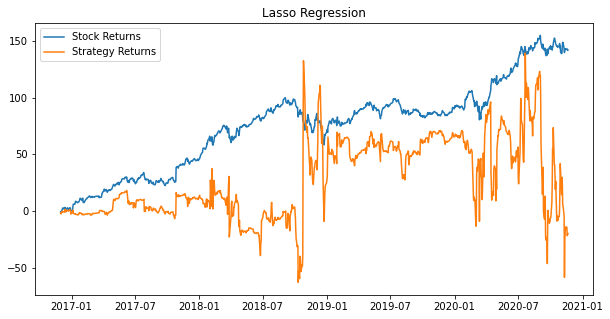

1.2316650710357575
Mean squared error: 24.05
Variance score: 0.00
Mean squared error: 1523.96
Variance score: -0.01


In [92]:
############################################################################################################################################
# LASSO and Ridge regression




def create_regression_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df['Target'] = df['Close'].shift(-1) - df['Close']
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    Y = df[['Target']]
    return (df, X, Y)

def create_train_split_group(X, Y, split_ratio=0.8):
    return train_test_split(X, Y, shuffle=False, train_size=split_ratio)


Stock_data, X, Y = create_regression_trading_condition(Stock_data)

X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

from sklearn import linear_model

# Fit the model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', lasso.coef_)

Stock_data['Predicted_Signal'] = lasso.predict(X)
Stock_data['Stock_Returns'] = np.log(
    Stock_data['Close'] / Stock_data['Close'].shift(1))

print(Stock_data.head())
def calculate_return(df, split_value, symbol):
    cum_Stock_return = df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns'] = df['%s_Returns' %
                                symbol] * df['Predicted_Signal'].shift(1)*1.9
    return cum_Stock_return


def calculate_strategy_return(df, split_value, symbol):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() *100
    return cum_strategy_return


cum_Stock_return = calculate_return(
    Stock_data, split_value=len(X_train), symbol='Stock')
cum_strategy_return = calculate_strategy_return(
    Stock_data, split_value=len(X_train), symbol='Stock')


def plot_shart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return, label='Strategy Returns')
    plt.legend()
    plt.title ("Lasso Regression")

    plt.show()

plot_shart(cum_Stock_return, cum_strategy_return, symbol='Stock')


def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std = strategy_returns.std()
    sharpe = (strategy_returns - symbol_returns) / strategy_std
    return sharpe.mean()


print(sharpe_ratio(cum_strategy_return, cum_Stock_return))

from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_train, lasso.predict(X_train)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_train, lasso.predict(X_train)))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, lasso.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, lasso.predict(X_test)))

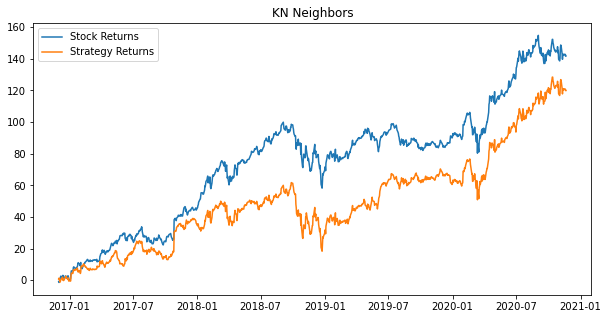

0.6474351244266677


In [93]:
############################################################################################################################################
# KNeighbors



Stock_data['Open-Close']=Stock_data.Open-Stock_data.Close
Stock_data['High-Low']=Stock_data.High-Stock_data.Low
Stock_data=Stock_data.dropna()
X=Stock_data[['Open-Close','High-Low']]
Y=np.where(Stock_data['Close'].shift(-1)>Stock_data['Close'],1,-1)

split_ratio=0.8
split_value=int(split_ratio * len(Stock_data))
X_train=X[:split_value]
Y_train=Y[:split_value]
X_test=X[split_value:]
Y_test=Y[split_value:]


knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))


Stock_data['Predicted_Signal']=knn.predict(X)
Stock_data['Stock_Returns']=np.log(Stock_data['Close']/
                                 Stock_data['Close'].shift(1))

def calculate_return(df,split_value,symbol):
    cum_Stock_return= df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns']= df['%s_Returns' % symbol] * df['Predicted_Signal'].shift(1)
    return cum_Stock_return

def calculate_strategy_return(df,split_value):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

cum_Stock_return=calculate_return(Stock_data,split_value=len(X_train),symbol='Stock')
cum_strategy_return= calculate_strategy_return(Stock_data,split_value=len(X_train))


def plot_shart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10,5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return,label='Strategy Returns')
    plt.legend()
    plt.title ("KN Neighbors")

    plt.show()

plot_shart(cum_Stock_return, cum_strategy_return,symbol='Stock')



def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std=strategy_returns.std()
    sharpe=(strategy_returns-symbol_returns)/strategy_std
    return sharpe.mean()

print(sharpe_ratio(cum_strategy_return,cum_Stock_return))


[*********************100%***********************]  1 of 1 completed


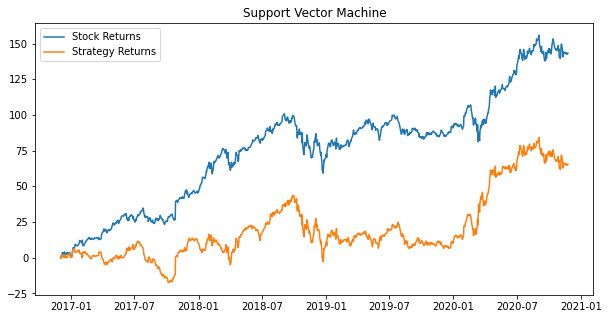

0.5265917602996255 0.500998003992016
1.4417968919680226


In [94]:
############################################################################################################################################
# SVC

Stock_data=load_financial_data(start_date='2001-01-01',
                    end_date = '2020-11-25',
                    output_file='Stock_data_large.pkl')

def create_trading_condition(df):
    df['Open-Close']=df.Open-df.Close
    df['High-Low']=df.High-df.Low
    df=df.dropna()
    X=df[['Open-Close','High-Low']]
    Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)
    return (X,Y)

def create_train_split_group(X,Y,split_ratio=0.8):
    return train_test_split(X,Y,shuffle=False,train_size=split_ratio)

X,Y=create_trading_condition(Stock_data)

X_train,X_test,Y_train,Y_test=\
    create_train_split_group(X,Y,split_ratio=0.8)

# Fit the model
svc=SVC()
svc.fit(X_train, Y_train)
# Forecast value

Stock_data['Predicted_Signal']=svc.predict(X)
Stock_data['Stock_Returns']=np.log(Stock_data['Close']/
                                 Stock_data['Close'].shift(1))


def calculate_return(df,split_value,symbol):
    cum_Stock_return= df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns']= df['%s_Returns' % symbol] * df['Predicted_Signal'].shift(1)
    return cum_Stock_return

def calculate_strategy_return(df,split_value):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

cum_Stock_return=calculate_return(Stock_data,split_value=len(X_train),symbol='Stock')
cum_strategy_return= calculate_strategy_return(Stock_data,split_value=len(X_train))


def plot_shart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10,5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return,label='Strategy Returns')
    plt.legend()
    plt.title ("Support Vector Machine")

    plt.show()

plot_shart(cum_Stock_return, cum_strategy_return,symbol='Stock')

def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std=strategy_returns.std()
    sharpe=(strategy_returns-symbol_returns)/strategy_std
    return sharpe.mean()

accuracy_train = accuracy_score(Y_train, svc.predict(X_train))
accuracy_test = accuracy_score(Y_test, svc.predict(X_test))
print(accuracy_train, accuracy_test)
print(sharpe_ratio(cum_strategy_return,cum_Stock_return))


[*********************100%***********************]  1 of 1 completed
0.5215980024968789 0.4880239520958084


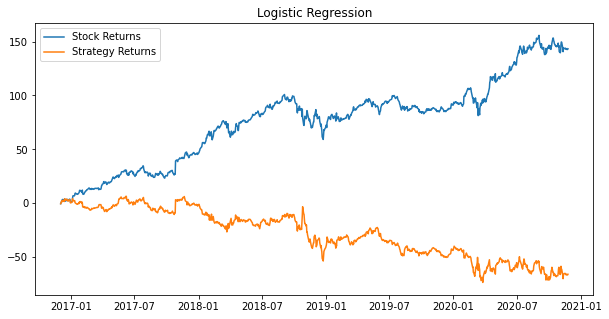

0.5215980024968789 0.4880239520958084
2.719035346452179


In [95]:
############################################################################################################################################
# Logistic Regression


start_date = '2001-01-01'
end_date = '2020-11-25'

Stock_data = yf.download('Amzn',start_date, end_date)

Stock_data['Open-Close']=Stock_data.Open-Stock_data.Close
Stock_data['High-Low']=Stock_data.High-Stock_data.Low
Stock_data=Stock_data.dropna()
X=Stock_data[['Open-Close','High-Low']]
Y=np.where(Stock_data['Close'].shift(-1)>Stock_data['Close'],1,-1)

split_ratio=0.8
split_value=int(split_ratio * len(Stock_data))
X_train=X[:split_value]
Y_train=Y[:split_value]
X_test=X[split_value:]
Y_test=Y[split_value:]


logistic=LogisticRegression()
logistic.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, logistic.predict(X_train))
accuracy_test = accuracy_score(Y_test, logistic.predict(X_test))
print(accuracy_train, accuracy_test)


Stock_data['Predicted_Signal']=logistic.predict(X)
Stock_data['Stock_Returns']=np.log(Stock_data['Close']/Stock_data['Close'].shift(1))


def calculate_return(df,split_value,symbol):
    cum_Stock_return= df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns']= df['%s_Returns' % symbol] * df['Predicted_Signal'].shift(1)
    return cum_Stock_return

def calculate_strategy_return(df,split_value):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

cum_Stock_return=calculate_return(Stock_data,split_value=len(X_train),symbol='Stock')
cum_strategy_return= calculate_strategy_return(Stock_data,split_value=len(X_train))


def plot_shart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10,5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return,label='Strategy Returns')
    plt.legend()
    plt.title ("Logistic Regression")

    plt.show()

plot_shart(cum_Stock_return, cum_strategy_return,symbol='Stock')

def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std=strategy_returns.std()
    sharpe=(strategy_returns-symbol_returns)/strategy_std
    return sharpe.mean()

accuracy_train = accuracy_score(Y_train, logistic.predict(X_train))
accuracy_test = accuracy_score(Y_test, logistic.predict(X_test))
print(accuracy_train, accuracy_test)
print(sharpe_ratio(cum_strategy_return,cum_Stock_return))

